## Question 1

(1000, 5)
(1000,)


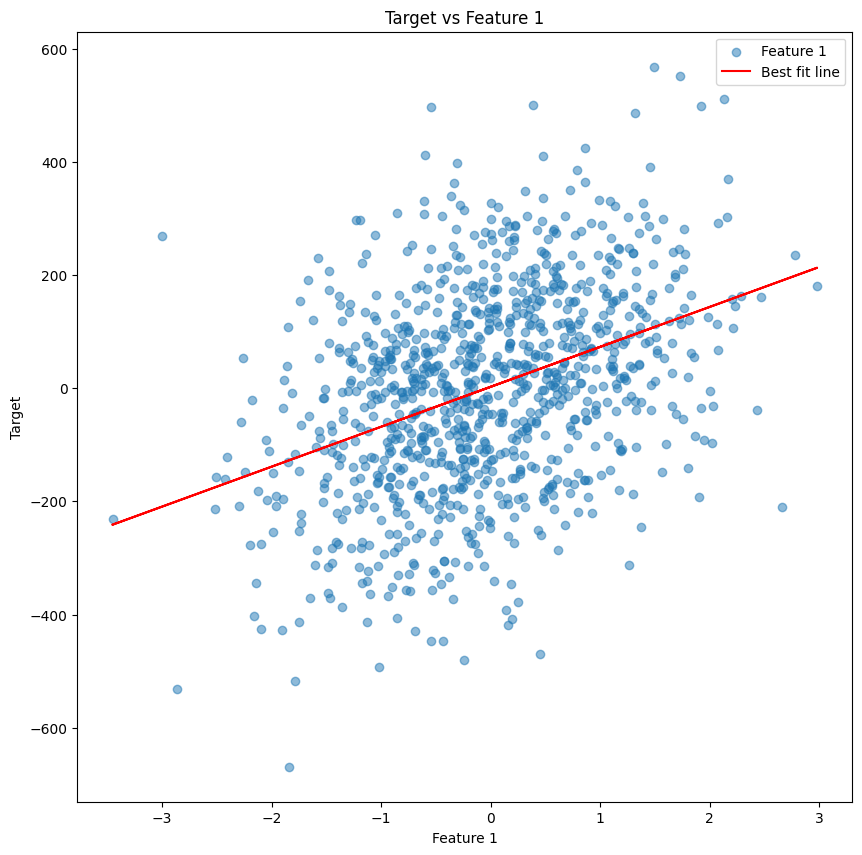

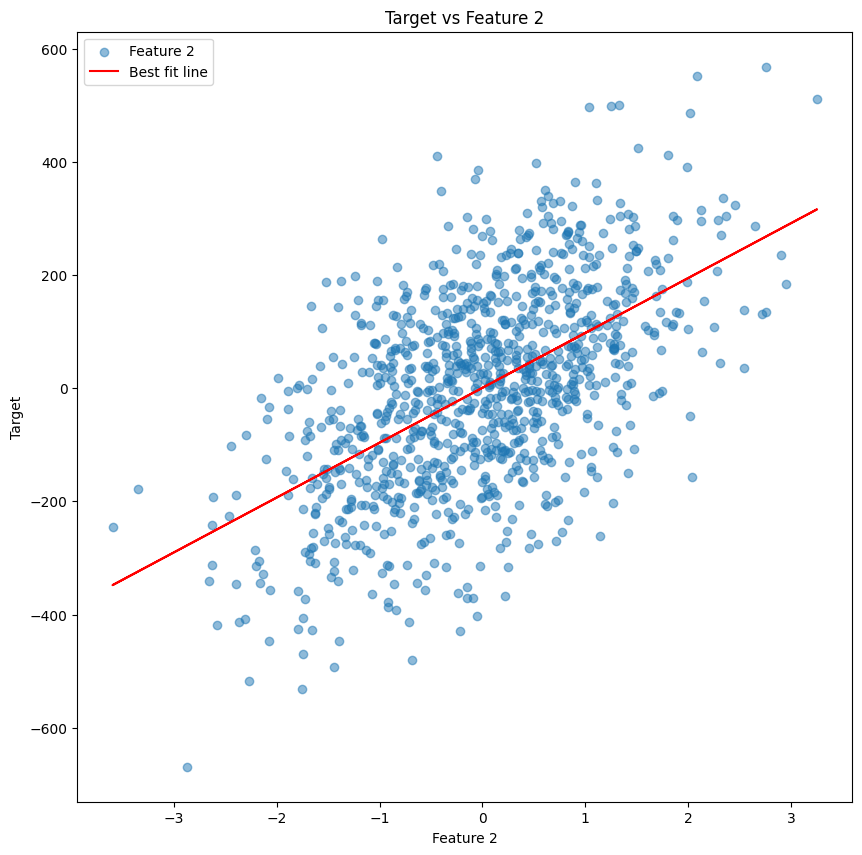

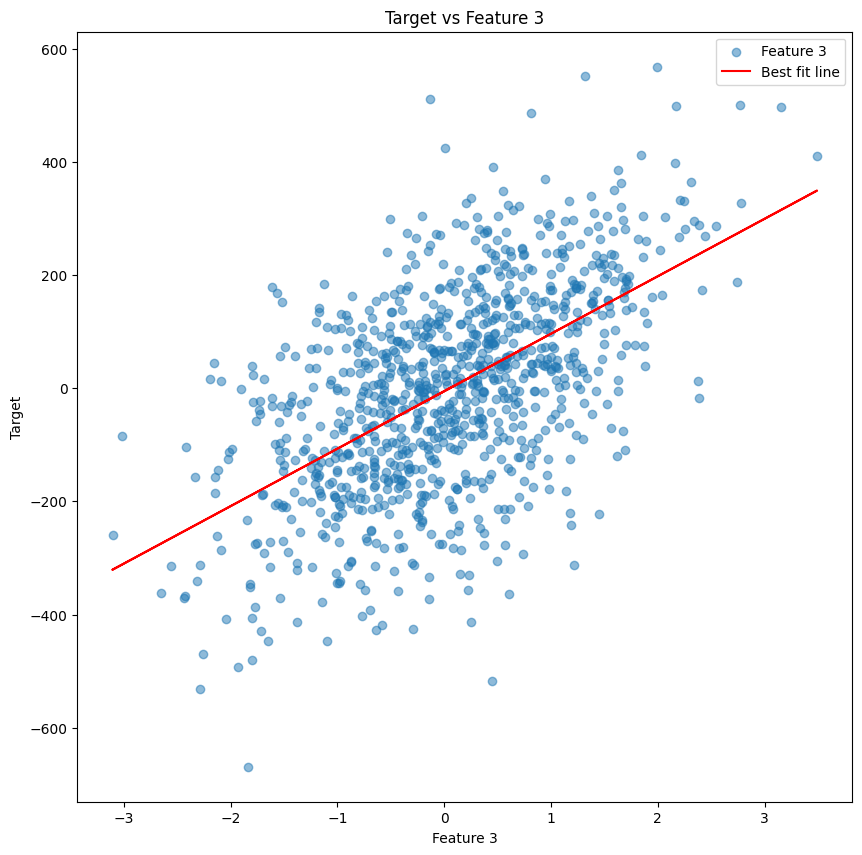

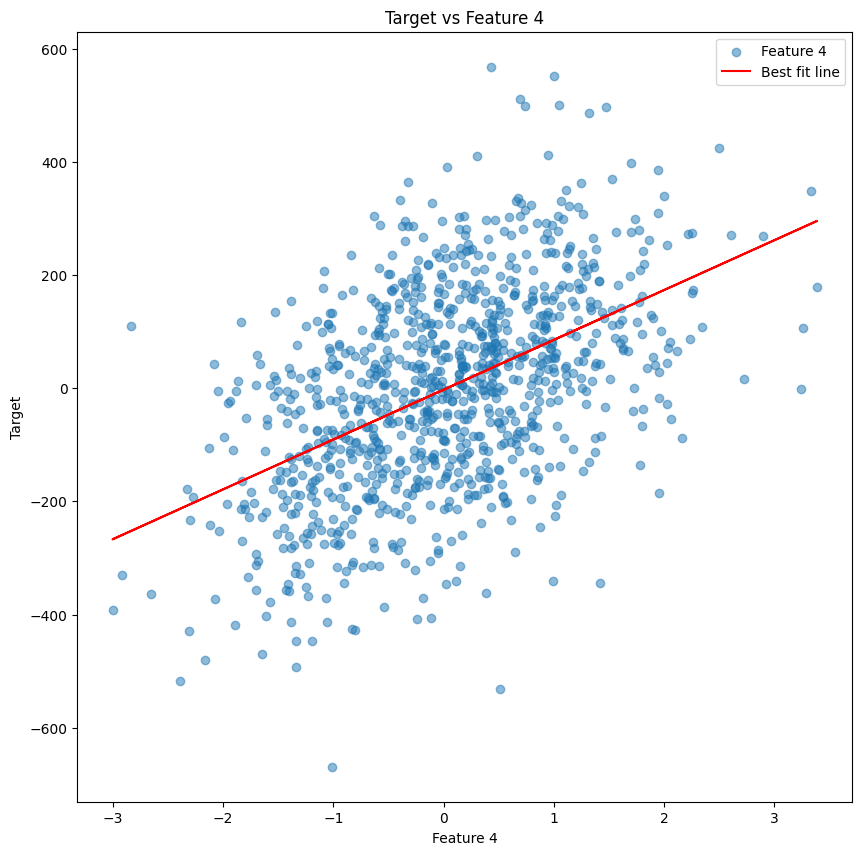

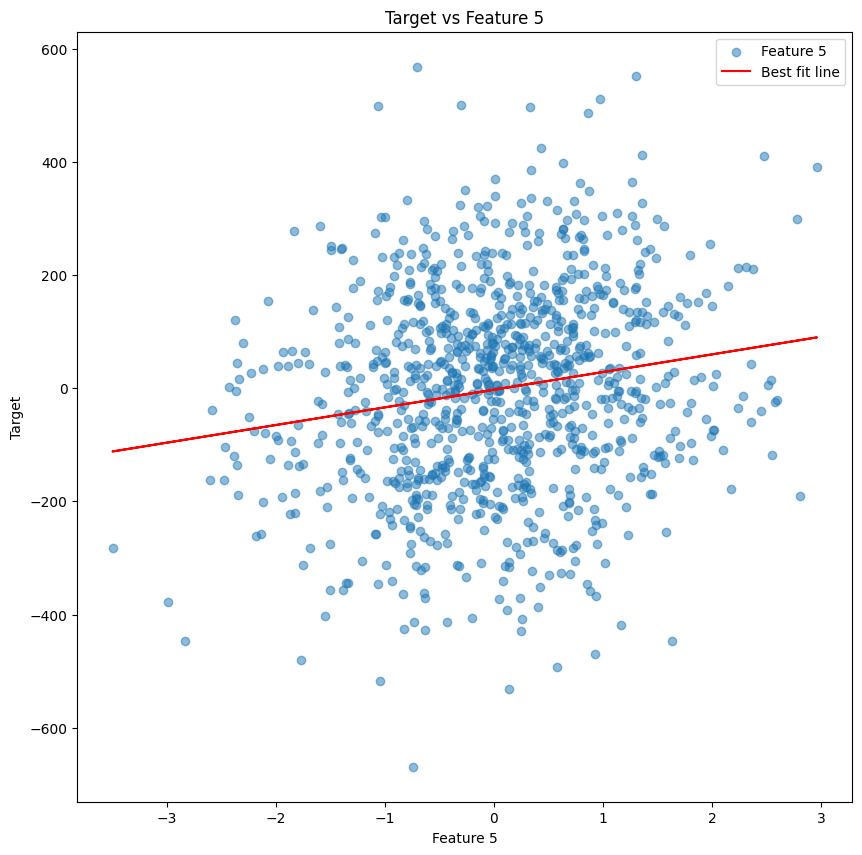

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Generate the dataset
X, y = make_regression(n_samples=1000, n_features=5, noise=0)
print(X.shape)
print(y.shape)

# Plotting the target against each feature
for i in range(5):
    plt.figure(figsize=(10, 10))
    plt.scatter(X[:, i], y, alpha=0.5, label=f'Feature {i+1}')

    m, b = np.polyfit(X[:, i], y, 1)

    plt.plot(X[:, i], m * X[:, i] + b, color='red', label='Best fit line')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Target')
    plt.legend()
    plt.title(f'Target vs Feature {i+1}')
    plt.show()


## Question 2

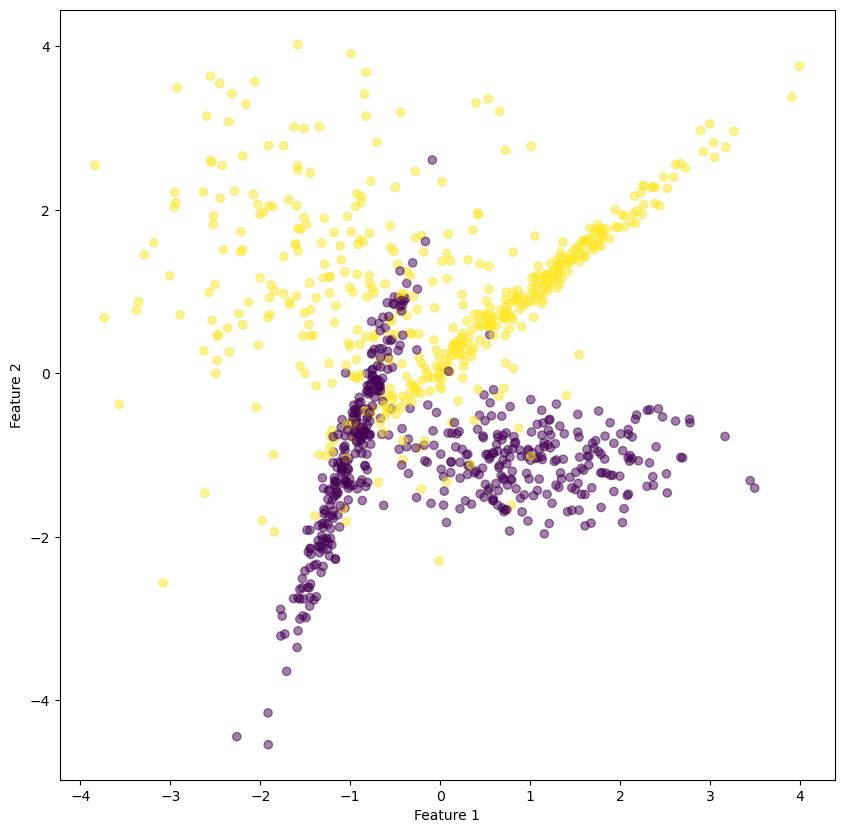

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate the dataset
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=2,
    n_classes=2,
    random_state=42
)

# Plot the data
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0],X[:,1], c=y, alpha = 0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Question 3

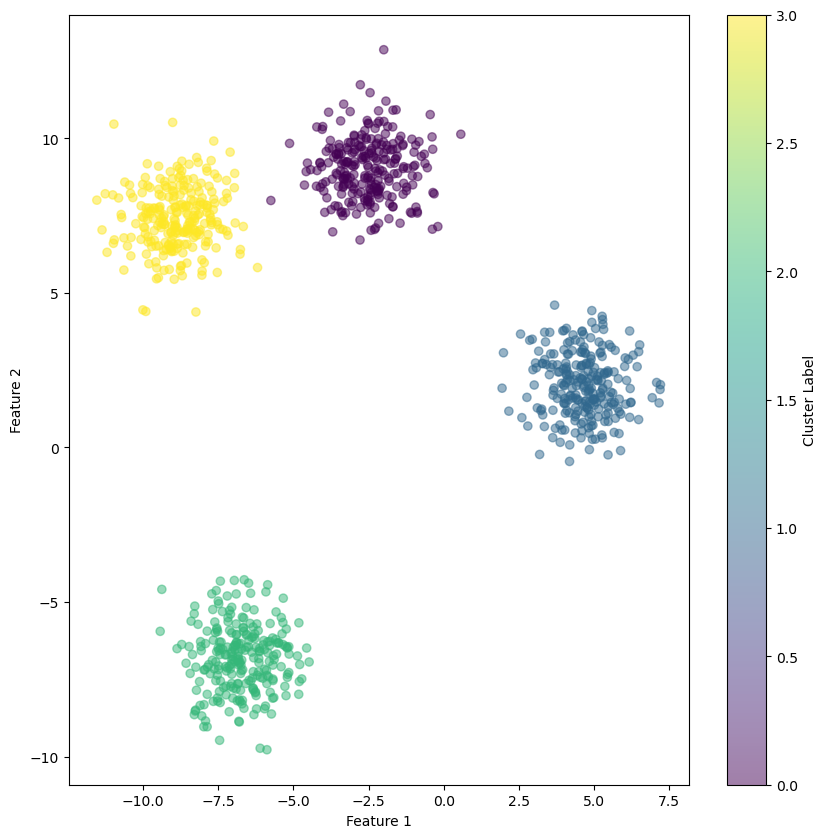

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=42)

# Plotting the data
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


## Question 4

In [ ]:
pip install requests beautifulsoup4 pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import requests as req
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.worldometers.info/coronavirus/'
response = req.get(url)
print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table', id='main_table_countries_today')

headers = []
for th in table.find_all('th'):
    headers.append(th.text.strip())

rows = []
for tr in table.find_all('tr'):
    cells = tr.find_all('td')
    if len(cells) > 0:
        row = [cell.text.strip() for cell in cells]
        rows.append(row)

df = pd.DataFrame(rows, columns=headers)

df = df[['Country,Other', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases']]
df.columns = ['Country', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases']

# Cleaning the data
def clean_data(x):
    if x in ['', 'N/A', 'NaN']:
        return 0
    return int(x.replace(',', '').replace('+', ''))

for col in ['Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases']:
    df[col] = df[col].apply(clean_data)

print(df.head())


200
         Country          Continent  Population  TotalCases  NewCases  \
0  North America      North America           0   131889132         0   
1           Asia               Asia           0   221500265         0   
2         Europe             Europe           0   253406198         0   
3  South America      South America           0    70200879         0   
4        Oceania  Australia/Oceania           0    14895771         0   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  
0      1695941          0       127665129           350      2528062  
1      1553662          0       205673091             0     14273512  
2      2101824          0       248754104           474      2550270  
3      1367332          0        66683585             0      2149962  
4        33015          0        14752388             0       110368  


In [ ]:
pip install --upgrade imbalanced-learn scikit-learn


Note: you may need to restart the kernel to use updated packages.


## Question 5

Original class distribution: Counter({0: 950, 1: 50})


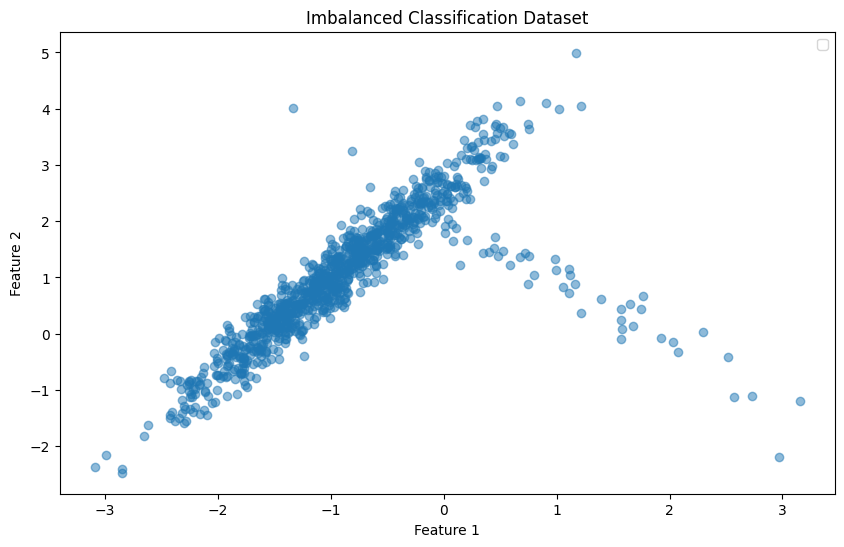

Class distribution after SMOTE: Counter({0: 950, 1: 237})


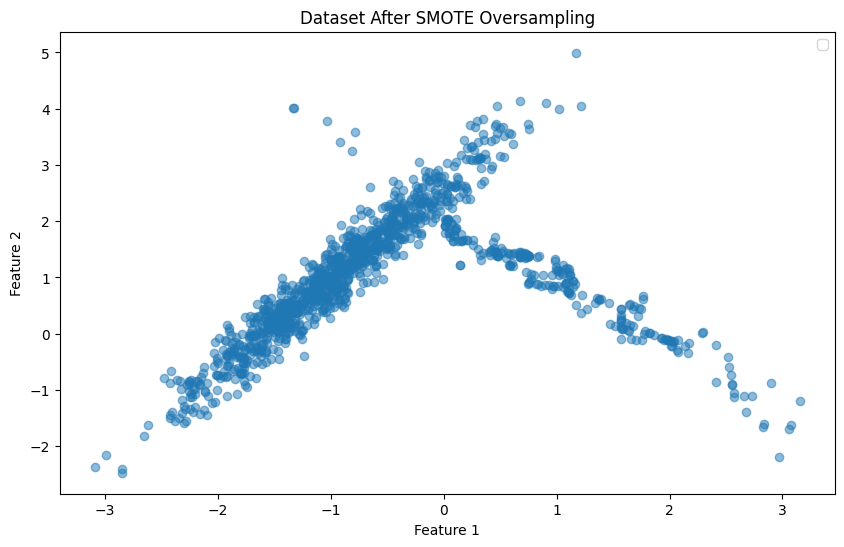

Class distribution after RandomUnderSampler: Counter({0: 316, 1: 237})


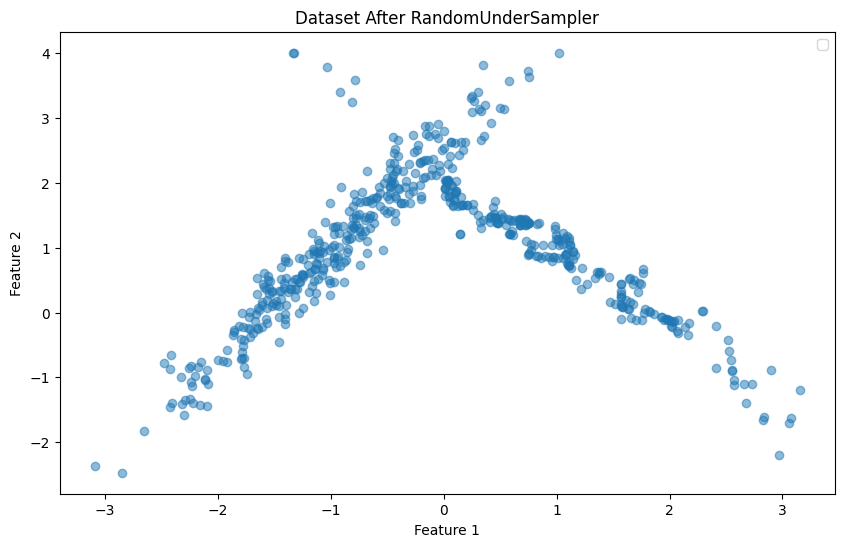

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.95, 0.05], flip_y=0, random_state=42)

print("Original class distribution:", Counter(y))

# Plot of imbalanced dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Imbalanced Classification Dataset')
plt.legend()
plt.show()

smote = SMOTE(sampling_strategy=0.25, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class distribution after SMOTE:", Counter(y_resampled))

# Plot of the oversampled dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset After SMOTE Oversampling')
plt.legend()
plt.show()

rus = RandomUnderSampler(sampling_strategy=0.75, random_state=42)
X_resampled_1, y_resampled_1 = rus.fit_resample(X_resampled, y_resampled)

print("Class distribution after RandomUnderSampler:", Counter(y_resampled_1))

# Plot of the undersampled dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_resampled_1[:, 0], X_resampled_1[:, 1], alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset After RandomUnderSampler')
plt.legend()
plt.show()


## Question 7

In [5]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)

print("First 5 rows of the DataFrame:")
print(df.head())

missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nDimensions of the training set:")
print(X_train.shape, y_train.shape)
print("Dimensions of the testing set:")
print(X_test.shape, y_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("\nFirst 5 rows of the standardized training set:")
print(pd.DataFrame(X_train_scaled, columns=iris.feature_names).head())


First 5 rows of the DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Dimensions of the training set:
(105, 4) (105,)
Dimensions of the testing set:
(45, 4) (45,)

First 5 rows of the standardized training set:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.413416         -1.462003          -0.099511         -0.323398
1           0.551222         -0.502563           0.717703          0.353032
2     